In [129]:
import math
from sympy import *
init_printing(use_unicode=True)

## Symbol Definitions:

In [130]:
p_bar = symbols(r'\bar{p}(S_m)')
p_0 = symbols(r'p_0')
y = symbols(r'y_i')
n = symbols(r'n_0')
m = symbols(r'm')
i = symbols(r'i')

## Dynamic Baysian Update Model:

$$\hat{p}(S_i) = \frac{n_0}{(i + n_0)}*p_0 + \bar{p}(S_i)*\lparen 1 + \frac{-n_0}{i + n_0}\rparen$$

In [131]:
# Compound Symbols / Equations
theta = n / (n + i) # symbols(r'\theta') - This will represent theta as the latex theta abstraction
p_hat = theta * p_0 + (1 - theta) * p_bar

print(p_hat)

\bar{p}(S_m)*(-n_0/(i + n_0) + 1) + n_0*p_0/(i + n_0)


## $n_0$ Loss Function:

$$Loss(n_0) = \frac{-1}{m} \sum_{i=1}^{m}{ \left\{ \lambda_i \left[ y_i \log{\hat{p}(S_i)}  + (1 - y_i) \log{\hat{p}(1 - S_i)} \right] + (p_0 - \hat{p}(S_i))^2 \right\} }$$

Its parts include...

1) $$\text{logloss} = y_i \log{\hat{p}(S_i)}  + (1 - y_i) \log{\hat{p}(1 - S_i)}$$

2) $$L_2 = (p_0 - \hat{p}(S_i))^2$$

In [132]:
# y = symbols(r'y_i')
# i = symbols(r'i')

lambd = (2 * i) / (m * (m + 1))
logloss_inside = lambd * (y * log(p_hat) + (1 - y) * log(1 - p_hat))
squared_error_loss_inside = (p_0 - p_hat)**2
loss_inside = logloss_inside + squared_error_loss_inside

print(loss_inside)

2*i*(y_i*log(\bar{p}(S_m)*(-n_0/(i + n_0) + 1) + n_0*p_0/(i + n_0)) + (1 - y_i)*log(-\bar{p}(S_m)*(-n_0/(i + n_0) + 1) - n_0*p_0/(i + n_0) + 1))/(m*(m + 1)) + (-\bar{p}(S_m)*(-n_0/(i + n_0) + 1) - n_0*p_0/(i + n_0) + p_0)**2


## Partial Derivatives:

#### Unsimplified:

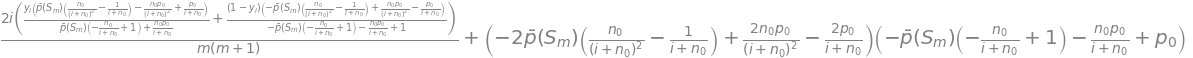

In [133]:
diff(loss_inside, n)

#### Simplified:

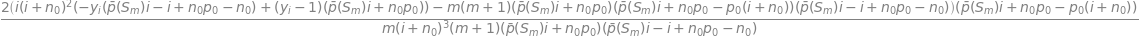

In [134]:
simplify(diff(loss_inside, n))

#### Abstracted:

In [135]:
lam_i = symbols(r'\lambda_i')


#### Checking-Work:

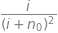

In [136]:
simplify(diff(theta, n))

In [137]:
#print(latex(p_hat))
#simplify(diff(p_hat, n))
print(latex(simplify(diff(log(p_hat), n))))

\frac{\bar{p}(S_m) i + n_{0} p_{0} - p_{0} \left(i + n_{0}\right)}{\left(i + n_{0}\right) \left(- \bar{p}(S_m) i - n_{0} p_{0}\right)}


$$\bar{p}(S_m) \left(- \frac{n_{0}}{i + n_{0}} + 1\right) + \frac{n_{0} p_{0}}{i + n_{0}}$$

-----

$$\displaystyle \frac{- \bar{p}(S_m) i - n_{0} p_{0} + p_{0} \left(i + n_{0}\right)}{\left(i + n_{0}\right)^{2}}$$

-----

$$ \frac{\bar{p}(S_m) i + n_{0} p_{0} - p_{0} \left(i + n_{0}\right)}{\left(i + n_{0}\right) \left(- \bar{p}(S_m) i - n_{0} p_{0}\right)} $$

In [138]:
# p_bar = symbols(r'\bar{p}(S_m)')
# p_0 = symbols(r'p_0')
# y = symbols(r'y_i')
# n = symbols(r'n_0')
# m = symbols(r'm')
# i = symbols(r'i')

d = diff(loss_inside, n)
print(latex(d))

for g in range(2, 10):
    d1 = d.subs(p_bar, 1/g)
    d2 = d1.subs(p_0, 1/g)
    d3 = d2.subs(y, 1/g)
    d4 = d3.subs(n, 1/g)
    d5 = d4.subs(m, 1/g)
    d6 = d5.subs(i, 1/g)

    print(d6)


d1 = d.subs(p_bar, .22)
d2 = d1.subs(p_0, .60)
d3 = d2.subs(y, .9)
d4 = d3.subs(n, .2)
d5 = d4.subs(m, 3)
d6 = d5.subs(i, 1)
print(latex(d6))


\frac{2 i \left(\frac{y_{i} \left(\bar{p}(S_m) \left(\frac{n_{0}}{\left(i + n_{0}\right)^{2}} - \frac{1}{i + n_{0}}\right) - \frac{n_{0} p_{0}}{\left(i + n_{0}\right)^{2}} + \frac{p_{0}}{i + n_{0}}\right)}{\bar{p}(S_m) \left(- \frac{n_{0}}{i + n_{0}} + 1\right) + \frac{n_{0} p_{0}}{i + n_{0}}} + \frac{\left(1 - y_{i}\right) \left(- \bar{p}(S_m) \left(\frac{n_{0}}{\left(i + n_{0}\right)^{2}} - \frac{1}{i + n_{0}}\right) + \frac{n_{0} p_{0}}{\left(i + n_{0}\right)^{2}} - \frac{p_{0}}{i + n_{0}}\right)}{- \bar{p}(S_m) \left(- \frac{n_{0}}{i + n_{0}} + 1\right) - \frac{n_{0} p_{0}}{i + n_{0}} + 1}\right)}{m \left(m + 1\right)} + \left(- 2 \bar{p}(S_m) \left(\frac{n_{0}}{\left(i + n_{0}\right)^{2}} - \frac{1}{i + n_{0}}\right) + \frac{2 n_{0} p_{0}}{\left(i + n_{0}\right)^{2}} - \frac{2 p_{0}}{i + n_{0}}\right) \left(- \bar{p}(S_m) \left(- \frac{n_{0}}{i + n_{0}} + 1\right) - \frac{n_{0} p_{0}}{i + n_{0}} + p_{0}\right)
0
0
0
0
0
0
0
0
-0.0335606981810812


In [90]:
k = diff(theta, n)
print(k)
j = k.subs(n, 1)
j.subs(i, 1)

-n_0/(i + n_0)**2 + 1/(i + n_0)


$$\left(- 2 \bar{p}(S_m) \left(\frac{n_{0}}{\left(n_{0} + 1\right)^{2}} - \frac{1}{n_{0} + 1}\right) + \frac{2 n_{0} p_{0}}{\left(n_{0} + 1\right)^{2}} - \frac{2 p_{0}}{n_{0} + 1}\right) \left(- \bar{p}(S_m) \left(- \frac{n_{0}}{n_{0} + 1} + 1\right) - \frac{n_{0} p_{0}}{n_{0} + 1} + p_{0}\right) + \frac{2 \left(\frac{y_{i} \left(\bar{p}(S_m) \left(\frac{n_{0}}{\left(n_{0} + 1\right)^{2}} - \frac{1}{n_{0} + 1}\right) - \frac{n_{0} p_{0}}{\left(n_{0} + 1\right)^{2}} + \frac{p_{0}}{n_{0} + 1}\right)}{\bar{p}(S_m) \left(- \frac{n_{0}}{n_{0} + 1} + 1\right) + \frac{n_{0} p_{0}}{n_{0} + 1}} + \frac{\left(1 - y_{i}\right) \left(- \bar{p}(S_m) \left(\frac{n_{0}}{\left(n_{0} + 1\right)^{2}} - \frac{1}{n_{0} + 1}\right) + \frac{n_{0} p_{0}}{\left(n_{0} + 1\right)^{2}} - \frac{p_{0}}{n_{0} + 1}\right)}{- \bar{p}(S_m) \left(- \frac{n_{0}}{n_{0} + 1} + 1\right) - \frac{n_{0} p_{0}}{n_{0} + 1} + 1}\right)}{m \left(m + 1\right)}$$

### Simplifying Further:

$$ \frac{\lambda_{i} \left(i + n_{0}\right)^{2} \left(\frac{y_{i} \left(i + n_{0}\right) \left(\frac{p_{0}}{i + n_{0}} - \frac{\bar{p}(S_m) i + n_{0} p_{0}}{\left(i + n_{0}\right)^{2}}\right)}{\bar{p}(S_m) i + n_{0} p_{0}} - \frac{\left(i + n_{0}\right) \left(y_{i} - 1\right) \left(\frac{1 - p_{0}}{i + n_{0}} - \frac{- \bar{p}(S_m) i + i - n_{0} p_{0} + n_{0}}{\left(i + n_{0}\right)^{2}}\right)}{- \bar{p}(S_m) i + i - n_{0} p_{0} + n_{0}}\right) + \lambda_{i} \left(2 i + 2 n_{0}\right) \left(y_{i} \log{\left(\frac{\bar{p}(S_m) i + n_{0} p_{0}}{i + n_{0}} \right)} - \left(y_{i} - 1\right) \log{\left(\frac{- \bar{p}(S_m) i + i - n_{0} p_{0} + n_{0}}{i + n_{0}} \right)}\right)}{\left(i + n_{0}\right)^{2}} - \frac{2 \left(\lambda_{i} \left(i + n_{0}\right)^{2} \left(y_{i} \log{\left(\frac{\bar{p}(S_m) i + n_{0} p_{0}}{i + n_{0}} \right)} - \left(y_{i} - 1\right) \log{\left(\frac{- \bar{p}(S_m) i + i - n_{0} p_{0} + n_{0}}{i + n_{0}} \right)}\right) + i^{2} \left(\bar{p}(S_m) - p_{0}\right)^{2}\right)}{\left(i + n_{0}\right)^{3}} $$

\frac{\lambda_{i} \left(i + n_{0}\right)^{2} \left(\frac{y_{i} \left(i + n_{0}\right) \left(\frac{p_{0}}{i + n_{0}} - \frac{\bar{p}(S_m) i + n_{0} p_{0}}{\left(i + n_{0}\right)^{2}}\right)}{\bar{p}(S_m) i + n_{0} p_{0}} - \frac{\left(i + n_{0}\right) \left(y_{i} - 1\right) \left(\frac{1 - p_{0}}{i + n_{0}} - \frac{- \bar{p}(S_m) i + i - n_{0} p_{0} + n_{0}}{\left(i + n_{0}\right)^{2}}\right)}{- \bar{p}(S_m) i + i - n_{0} p_{0} + n_{0}}\right) + \lambda_{i} \left(2 i + 2 n_{0}\right) \left(y_{i} \log{\left(\frac{\bar{p}(S_m) i + n_{0} p_{0}}{i + n_{0}} \right)} - \left(y_{i} - 1\right) \log{\left(\frac{- \bar{p}(S_m) i + i - n_{0} p_{0} + n_{0}}{i + n_{0}} \right)}\right)}{\left(i + n_{0}\right)^{2}} - \frac{2 \left(\lambda_{i} \left(i + n_{0}\right)^{2} \left(y_{i} \log{\left(\frac{\bar{p}(S_m) i + n_{0} p_{0}}{i + n_{0}} \right)} - \left(y_{i} - 1\right) \log{\left(\frac{- \bar{p}(S_m) i + i - n_{0} p_{0} + n_{0}}{i + n_{0}} \right)}\right) + i^{2} \left(\bar{p}(S_m) - p_{0}\right)^{2

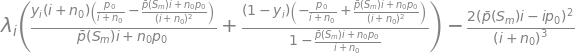

In [127]:
lambd = symbols(r'\lambda_i')
p_hat_simple = simplify(p_hat)
logloss_inside_simple = lambd * (y * log(p_hat_simple) + (1 - y) * log(1 - p_hat_simple))
squared_error_loss_inside_simple = simplify((p_0 - p_hat)**2)
loss_inside_simple = logloss_inside_simple + squared_error_loss_inside_simple

print(latex(diff(simplify(loss_inside_simple), n)))
t = symbols(r'\theta')

diff(loss_inside_simple, n)

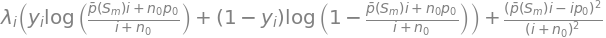

In [113]:
loss_inside_simple

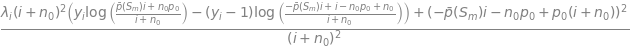